In [3]:
import numpy as np
import math
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [5]:
mat = scipy.io.loadmat('D:/Users/Ziqiu/OneDrive/Documents/University Docs/Stat441/Stat441 A1/0_1_2.mat')
df = mat['X']
dft = df.transpose()
dft -= dft.mean(axis=0)
'''
test = np.matmul(df,df.transpose())
test.transpose() == dft
'''

U, S, Vh = np.linalg.svd(dft)
pca = np.matmul(dft,Vh.transpose())
Y = pca[:,0:2]

In [6]:
label0 = Y[0:100,:]
label1 = Y[100:200,:]
label2 = Y[200:300,:]
u0 = label0.mean(axis=0)
u1 = label1.mean(axis=0)
u2 = label2.mean(axis=0)

s1 = np.cov(label0.T)
s2 = np.cov(label1.T)
s3 = np.cov(label2.T)
s = (s1 + s2 + s3)/3
Sinv=(np.linalg.inv(s))

In [7]:
#For QDA

def Q_argmaxd(x):
    def q0(x):
        return -0.5 * np.log(abs(np.linalg.det(s1))) - 0.5 * (x - u0).T @ np.linalg.inv(s1) @ (x - u0)
    def q1(x):
        return -0.5 * np.log(abs(np.linalg.det(s2))) - 0.5 * (x - u1).T @ np.linalg.inv(s2) @ (x - u1)
    def q2(x):
        return -0.5 * np.log(abs(np.linalg.det(s3))) - 0.5 * (x - u2).T @ np.linalg.inv(s3) @ (x - u2)
    if max(q0(x),q1(x),q2(x)) == q0(x):
        return 0
    if max(q0(x),q1(x),q2(x)) == q1(x):
        return 1
    return 2

def Q_classifier(x):
    return [Q_argmaxd(i) for i in x]

In [8]:
x_min, x_max = Y[:, 0].min() - 1, Y[:, 0].max() + 1
y_min, y_max = Y[:, 1].min() - 1, Y[:, 1].max() + 1

h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Q_Z = np.array(Q_classifier(np.c_[xx.ravel(), yy.ravel()]))
Q_Z = Q_Z.reshape(xx.shape)

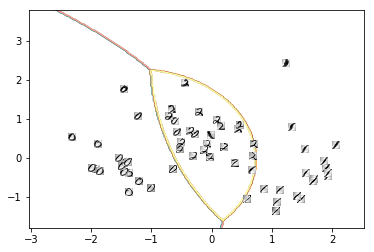

In [9]:
X=np.reshape(mat['X'], (8,8,300))

def plotimages(images, Y, scale=0.9, proportion=0.2):
    '''
    Input:
        images: images, must be in a 3-dimensional matrix (x by y by n)
            e.g. if X is 64 by 400 and size of each image is 8 by 8, images=np.reshape(X,(8,8,400));
        Y: coordinates of where to plot the image (Y(1,:) by Y(2,:)
        scale: scale of each image wrt to figure size (scale <= 1, e.g. 0.8)
        proportion: proportion of the data to be ploted (proportion <= 1)
            e.g. if there are 400 data points proportion = 1, plots
            all 400 data points and proportion = 0.5 plot only 200 data points 
            (i.e. 1th, 3th, 5th, ...)
    Ali Ghodsi 2006
    '''
    
    inc = np.floor(1/proportion)
    
    image_width = images.shape[0]
    image_height = images.shape[1] 
    n_images = images.shape[2]
    
    plt.gray()
    fig = plt.gcf()
    fig.clf()
    ax = plt.subplot(111)
    ax.set_xlim((Y[0,:].min()*1.2,Y[0,:].max()*1.2))
    ax.set_ylim((Y[1,:].min()*1.2,Y[1,:].max()*1.2))
    
    for counter in np.arange(0,n_images,inc):
        counter = int(counter)
        xy = (Y[0,counter],Y[1,counter])
        current_image = 1-np.reshape(images[:,:,counter], (image_width,image_height))
        imagebox = OffsetImage(current_image, zoom=scale)
        ab = AnnotationBbox(imagebox, xy, xybox=(1., -1.), xycoords='data', boxcoords="offset points", frameon=False)                                  
        ax.add_artist(ab)
        plt.draw()
    plt.contour(xx, yy, Q_Z, cmap=plt.cm.Paired)    
    plt.show()
    
plotimages(X, Y.transpose())

In [10]:
#Calculating decision boundaries between class 1 and class 0
#constant terms
print(-u1.T @ np.linalg.inv(s2) @ u1 + u0.T @ np.linalg.inv(s1) @ u0)
#linear terms
print(2*u1.T @ np.linalg.inv(s2) - 2*u0.T @ np.linalg.inv(s1))
#Quadratic terms
print(np.linalg.inv(s1) - np.linalg.inv(s2))

0.06309617079109309
[14.97602563  3.35527381]
[[-0.11568778 -0.4514136 ]
 [-0.4514136   1.30457285]]


In [11]:
#Calculating decision boundaries between class 2 and class 1
#constant terms
print(-u2.T @ np.linalg.inv(s3) @ u2 + u1.T @ np.linalg.inv(s2) @ u1)
#linear terms
print(2*u2.T @ np.linalg.inv(s3) - 2*u1.T @ np.linalg.inv(s2))
#Quadratic terms
print(np.linalg.inv(s2) - np.linalg.inv(s3))

4.784709924334375
[-7.27142858 -0.12958265]
[[-2.9963472  -0.02587864]
 [-0.02587864 -2.16653189]]


In [12]:
def F_argmaxd(x):
    def f0(x):
        return (x - u0).T @ (x - u0)
    def f1(x):
        return (x - u1).T @ (x - u1)
    def f2(x):
        return (x - u2).T @ (x - u2)
    if max(f0(x),f1(x),f2(x)) == f0(x):
        return 0
    if max(f0(x),f1(x),f2(x)) == f1(x):
        return 1
    return 2

def F_classifier(x):
    return [F_argmaxd(i) for i in x]

In [13]:
print(np.bincount(F_classifier(Y[0:100,:])))
print(np.bincount(F_classifier(Y[100:200,:])))
print(np.bincount(F_classifier(Y[200:300,:])))
print(np.bincount(Q_classifier(Y[0:100,:])))
print(np.bincount(Q_classifier(Y[100:200,:])))
print(np.bincount(Q_classifier(Y[200:300,:])))

[ 5 95]
[94  6]
[53 47]
[89  1 10]
[ 0 90 10]
[ 5  6 89]
